# Indian diabetes

### import libraries

In [1]:
from numpy import loadtxt
from keras.models import Model
from keras.layers import Dense, Activation, Input, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


### load the dataset

In [2]:
dataset = loadtxt("pima-indians-diabetes.csv",delimiter=',')

### split data into training set and test set

In [3]:
X = dataset[:,0:8]
Y = dataset[:,8]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

### network parameters

In [4]:
epochs = 1000
batch_size = 70
input_shape = (8,)

### model

In [7]:
def build_model():
    inputs = Input(shape=input_shape)
    z = Dense(500,activation='relu')(inputs)
    z = Dense(100,activation='relu')(z)
    outputs = Dense(1,activation='sigmoid')(z)
    return Model(inputs,outputs)

model = build_model()

model.compile(loss='binary_crossentropy',optimizer='adamax',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0)

### plotting and evaluating

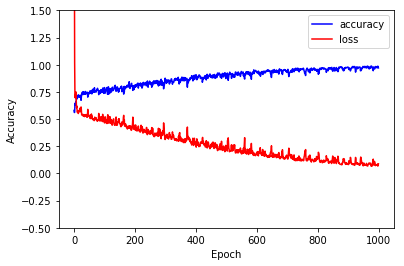

154/154 [==============================] - 0s 121us/step

Accuracy: 66.9%


In [8]:
plt.plot(history.history['accuracy'],'b', label='accuracy')
plt.plot(history.history['loss'], 'r', label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5,1.5])
plt.legend(loc='best')
plt.show()

score = model.evaluate(x_test,y_test)
print("\nAccuracy: %.1f%%" % (100*score[1]))

### make a prediction

In [9]:
predictions = model.predict(X)
for i in range(5):
    print("%s => %d (expected %d)" % (X[i].tolist(), predictions[i], Y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
